In [22]:
import pandas as pa
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
a = pa.read_csv('exams.csv'); 

In [24]:
#problématique : quel est le facteur principal permettant la réussite des étudiants lors des examens ?

In [25]:
#on calcule la moyenne de chaque éleve et on vérifie ensuite l'écart type pour voir si cette moyenne est fiable
a=a.assign(Result=a.mean(axis=1,numeric_only=True))
a.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Result
0,male,group A,high school,standard,completed,67,67,63,65.666667
1,female,group D,some high school,free/reduced,none,40,59,55,51.333333
2,male,group E,some college,free/reduced,none,59,60,50,56.333333
3,male,group B,high school,standard,none,77,78,68,74.333333
4,male,group E,associate's degree,standard,completed,78,73,68,73.000000


In [26]:
a.Result.describe()
#l'écart type est correct par rapport au sujet

count    1000.000000
mean       67.712000
std        14.514244
min        21.666667
25%        58.583333
50%        67.333333
75%        78.333333
max       100.000000
Name: Result, dtype: float64

<AxesSubplot:xlabel='Result', ylabel='test preparation course'>

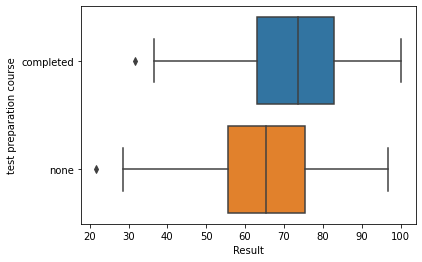

In [27]:
#on commence par voir si la préparation a une influence sur le resultat
sns.boxplot(data=a, x="Result", y="test preparation course")

<AxesSubplot:xlabel='Result', ylabel='test preparation course'>

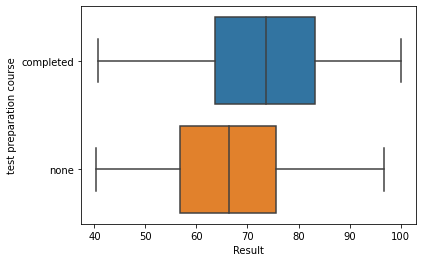

In [28]:
# boite a moustache en enlevant les valeurs abérrantes 
value = a.loc[(a['Result'] > 40)]
sns.boxplot(data=value, x="Result", y="test preparation course")
#observation : les personnes ayant révisé sont en moyenne meilleurs sur exam que les personnes qui n'ont pas révisé 

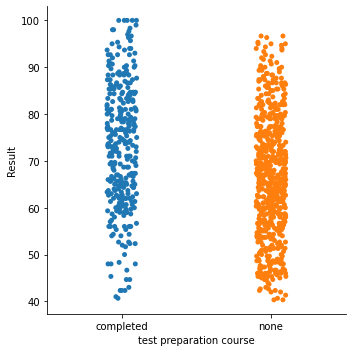

In [177]:
sns.catplot(data=value, y="Result", x="test preparation course")

In [13]:
#il faudra ensuite étudier d'autre facteur qui pourraient influer sur ces résultat pour tirer une conclusion finale
#nous pouvons ensuite comparer les résultat par rapport au groupe ethnique --'

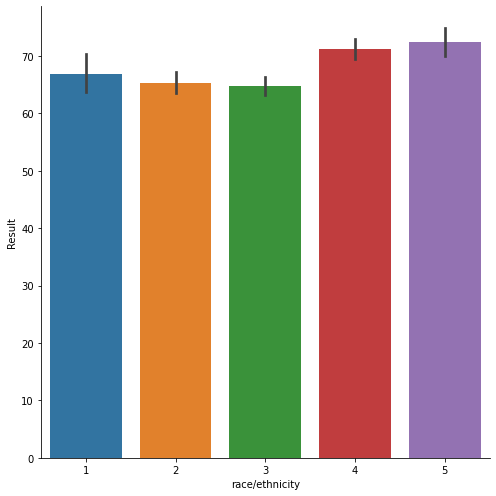

In [178]:
a['race/ethnicity'] = a['race/ethnicity'].replace(to_replace=["group A","group B","group C","group D","group E"],
value=[1,2,3,4,5])
sns.catplot(data=a, x="race/ethnicity", y="Result",height=7, kind='bar' )
#on observe que les groupes E ET D sont plus performants que le reste

In [168]:
#il pourrait etre interessant de voir quel groupe ethnique a le + révisé pour ainsi mettre en relation nos deux hypotheses précedentes, si possible

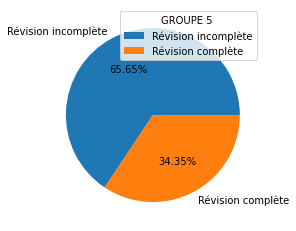

In [166]:
tmp = a[a['race/ethnicity'] == 5] 
tmp['test preparation course'].value_counts()
x = [86, 45]
plt.pie(x, labels = ['Révision incomplète', 'Révision complète'], 
        normalize = True,
        autopct = lambda x: str(round(x, 2)) + '%')
plt.legend(title='GROUPE 5 ')


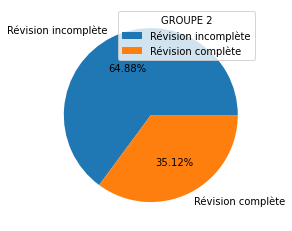

In [173]:
tmp = a[a['race/ethnicity'] == 2] 
tmp['test preparation course'].value_counts()
x = [133, 72]
plt.pie(x, labels = ['Révision incomplète', 'Révision complète'], 
        normalize = True,
        autopct = lambda x: str(round(x, 2)) + '%')
plt.legend(title='GROUPE 2')

In [ ]:
#Grace à cette partie de l'étude nous pouvont voir les notes supérieurs du groupe 5 ne s'expliquent pas par le fait que le groupe révise + que les autres

#Cependant nous allons vérifier si le niveau d'études des parents contribue au meilleurs résultats de leur enfants

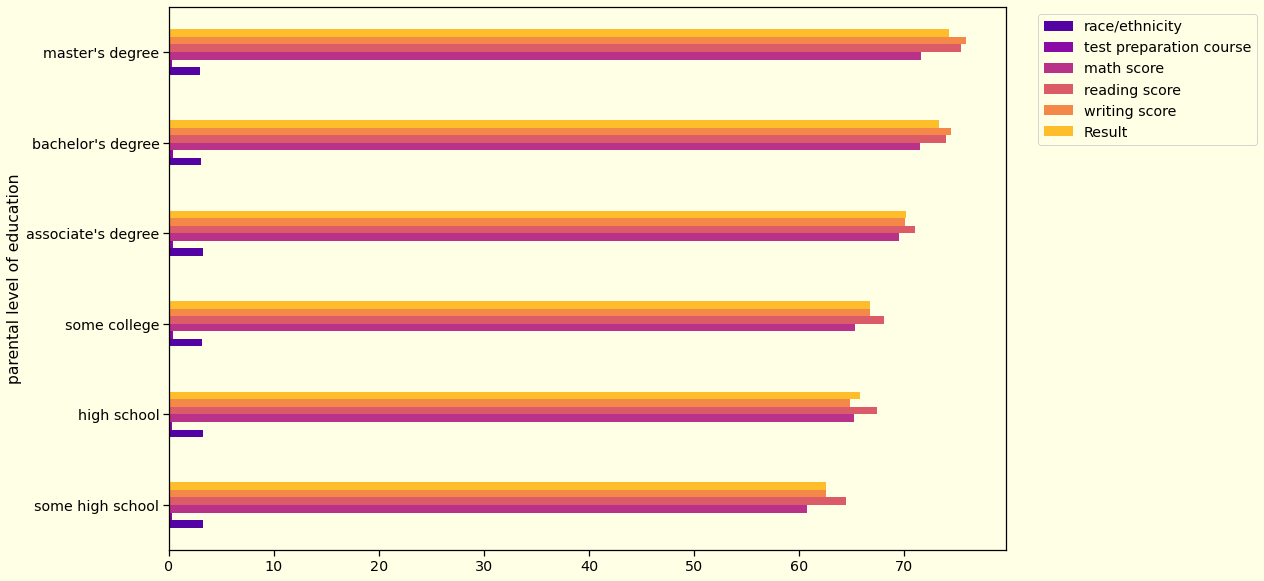

In [265]:
a.groupby('parental level of education').agg('mean').sort_values(by = 'Result').plot(kind='barh',figsize=(15,10))
plt.legend(bbox_to_anchor=(1.03, 1), loc = 2);
#on remarque effectivement que le niveau d'études des parents peut être un facteur de réussite comme le démontre le graphique 

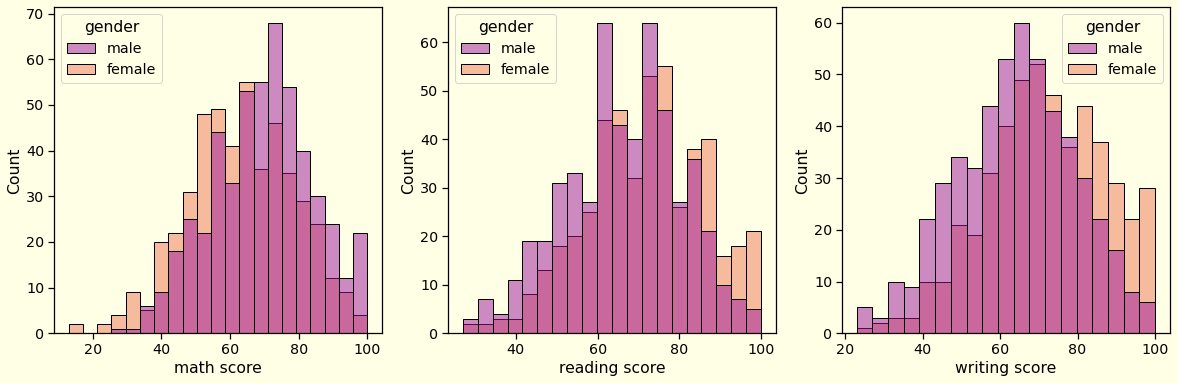

In [204]:
#cependant d'autres facteurs ne sont pas exclus, tel que le genre des étudiants : 
fig, ax = plt.subplots(1, 3, figsize = (20, 6))
ax1 = sns.histplot(x = a['math score'], hue = a['gender'], palette= 'plasma', ax= ax[0])
ax1 = sns.histplot(x = a['reading score'], hue = a['gender'], palette= 'plasma', ax= ax[1])
ax1 = sns.histplot(x = a['writing score'], hue = a['gender'] , palette= 'plasma', ax= ax[2])
#on remarque que les hommes ont + de facilité en math et à l'inverse dans les matières 

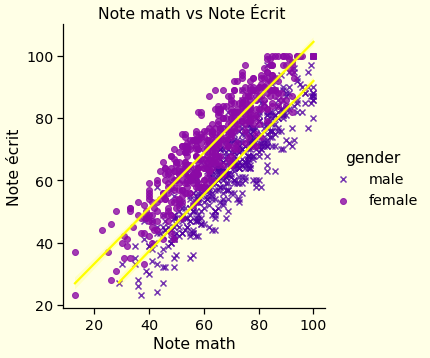

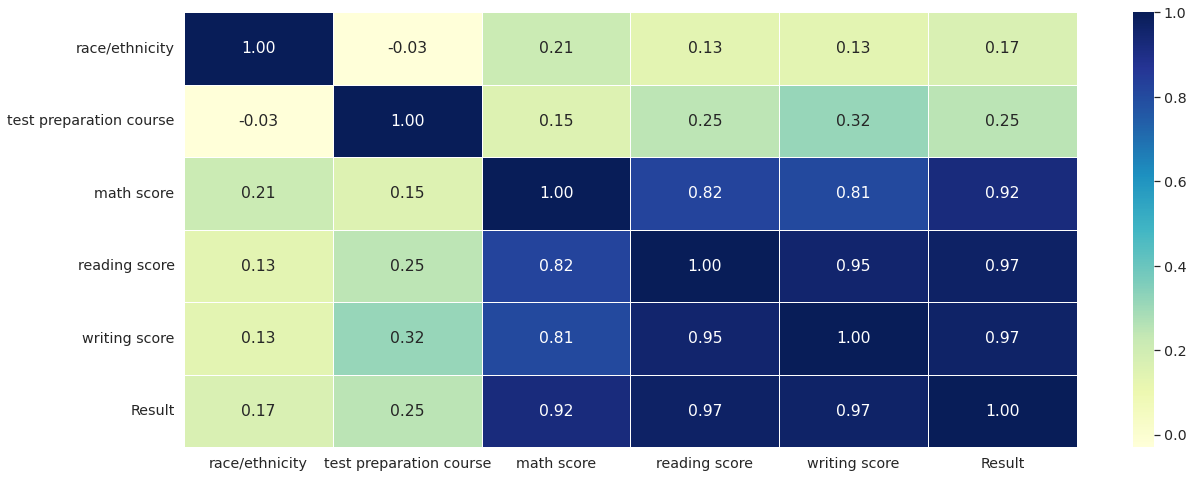

In [268]:
sns.lmplot(x='math score',y='writing score',hue='gender',data=a,markers=['x','o'],line_kws={'color': 'yellow'})
plt.xlabel('Note math')
plt.ylabel('Note écrit')
plt.title('Note math vs Note Écrit ')
plt.show();
with sns.axes_style('white'):
    plt.figure(figsize= (20, 8))
    sns.heatmap(a.corr(), annot = True, fmt = '.2f', linewidths= 0.8, cmap="YlGnBu")

<Figure size 720x720 with 0 Axes>

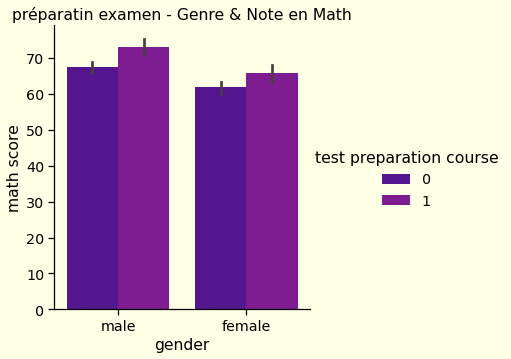

<Figure size 720x720 with 0 Axes>

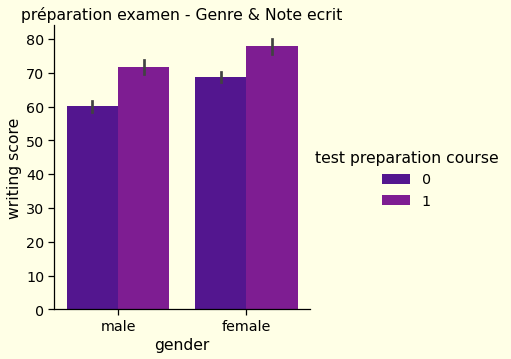

In [267]:
plt.figure(figsize=(10,10))
sns.catplot(x="gender", y="math score",
                 hue="test preparation course",
                 data=a, kind="bar")
plt.title('préparatin examen - Genre & Note en Math')
plt.show();

plt.figure(figsize=(10,10))
sns.catplot(x="gender", y="writing score",
                 hue="test preparation course",
                 data=a, kind="bar")
plt.title('préparation examen - Genre & Note ecrit')
plt.show()